## Resume Classification

Natural Language Processing (NLP) is a field of artificial intelligence that focuses on the interaction between computers and human language. It enables machines to understand, interpret, and generate human language in a meaningful way

### Importing basic libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [47]:
resumes_summary = pd.read_csv("/content/resumes_summary.csv")
sql_developer = pd.read_csv("/content/SQL Developer.csv")
people_soft = pd.read_csv("/content/People Soft.csv")
workday_df = pd.read_csv("/content/workday.csv")
react_developer = pd.read_csv("/content/React Deloper.csv")

# Combine all dataframes
all_resumes_df = pd.concat([sql_developer, people_soft, workday_df, react_developer], ignore_index=True)

In [3]:
sql_developer = pd.read_csv("/content/SQL Developer.csv")
sql_developer.head(10)

,content,file_name
0,ANIL KUMAR MADDUKURI \t\t\nSQL & MSBI Develop...,SQL Developer
1,Aradhana Tripathi\nCurrent Location: Gachibowl...,SQL Developer
2,BUDDHA VAMSI ...,SQL Developer
3,KAMBALLA PRADEEP ...,SQL Developer
4, Hyderabad\nNazeer Basha\nSQL and Power BI De...,SQL Developer
5,Resume...,SQL Developer
6,SQL DEVELOPER\nName: - Bandi prem sai\nWilli...,SQL Developer
7,SQL SER...,SQL Developer
8,SQL SER...,SQL Developer
9,RAJU PAVANA KUMARI\nProfessional Summary:\nHa...,SQL Developer


In [4]:
people_soft = pd.read_csv("/content/People Soft.csv")
people_soft.head(10)

,content,file_name
0,Anubhav Kumar Singh\t\t\n To work in a glob...,People Soft
1,Profile Summary:\t\t\t\t\t\t\t\t\t\t\n7+ years...,People Soft
2,PeopleSoft Database Administrator\nGangareddy ...,People Soft
3,Murali\nExperience Summary \nI have 6 years of...,People Soft
4,"Priyanka Ramadoss\n61/46, MountPleasant, \nCoo...",People Soft
5,PROFILE SUMMARY\nI have overall 6.8 years’ exp...,People Soft
6,PEOPLESOFT Administrator\nSRINIVAS.K \t\t\t\t\...,People Soft
7,PeopleSoft Admin\nVARKALA VIKAS\nCareer Objec...,People Soft
8,Vinod Akkala ...,People Soft
9,PeopleSoft Admin/PeopleSoft DBA\nGanesh Allad...,People Soft


In [5]:
df=pd.read_csv("/content/workday.csv")
df.head(10)

,content,file_name
0,Chinna Subbarayudu M\nDOB: 06th March 1994\nNa...,workday
1,Name : Gopi Krishna Reddy\nPROFESSIONA...,workday
2,Hari Krishna M\nSummary:\nA result oriented pr...,workday
3,Harikrishna Akula ...,workday
4,HIMA.MENDU\nCareer Objective\nTo continue grow...,workday
5,...,workday
6,\t\t\t\t\t\t\tName:\tJ. Sumanth Royal.\nPROFES...,workday
7,JYOTI VERMA\t\t\t\t\t\n3 years of Experience i...,workday
8,\t\t\t\t\tMadeeswar A\nPROFILE SUMMARY:\nHavin...,workday
9,Mooraboyina Guravaiah\nWorkday Integration Spe...,workday


In [6]:
react_developer = pd.read_csv("/content/React Deloper.csv")
react_developer.head(10)

,content,file_name
0,Name: Ravali P \n ...,React Developer
1,SUSOVAN BAG \nSeeking a challenging posi...,React Developer
2,Kanumuru Deepak Reddy\nCAREER OBJECTIVE:\nTo s...,React Developer
3,HARIPRIYA BATTINA \nExperience as UI Developer...,React Developer
4,KAMALAKAR REDDY. A \nLinked In: https://www.li...,React Developer
5,Naveen Sadhu\nTitle: software developer\t\t\t\...,React Developer
6,PROFILE\nSearching for the opportunity to brin...,React Developer
7,PRAGNYA PATTNAIK\n Expertise: \nHaving around ...,React Developer
8," 204,Sri geethika prestige,road number 10,ban...",React Developer
9,Thirupathamma Balla\nSUMMARY:\n2.8 year of IT ...,React Developer


In [7]:
df.describe()

,content,file_name
count,21,21
unique,21,1
top,Chinna Subbarayudu M\nDOB: 06th March 1994\nNa...,workday
freq,1,21


### Checking for Null values

In [8]:
df.isnull().sum()

,0
content,0
file_name,0


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
val_count=df['file_name'].value_counts() # counting the files individual
val_count


,count
file_name,
workday,21


## Visualisation

In [12]:
import plotly.express as px
import pandas as pd

# Example data — replace with  actual counts
data = {
    "category": ["React Developer", "SQL Developer", "Peoplesoft", "Workday"],
    "count": [24, 14, 20, 21]
}

pie_df = pd.DataFrame(data)

# Create pie chart
fig = px.pie(
    pie_df,
    names='category',
    values='count',
    title='Resume Distribution by Job Role',
    color_discrete_sequence=px.colors.qualitative.Pastel1)

fig.show()

From the above, we can see that 33.3% of the resumes are for PeopleSoft, making it the most common skill in the dataset. Next is Workday, which appears in 22.2% of the resumes, followed by PeopleSoft at 26.7%. Lastly, 17.8% of the resumes are for SQL Developers.



### histplot

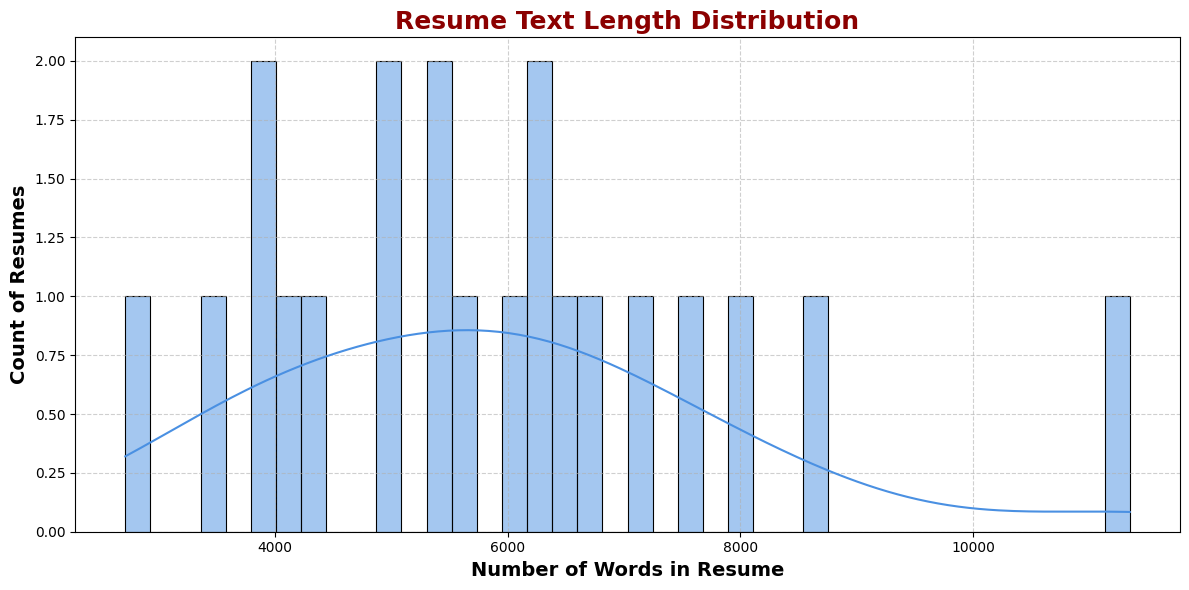

In [13]:
df['text_length'] = df['content'].apply(len)
plt.figure(figsize=(12, 6))
palette_color = "#4A90E2"
sns.histplot(
    data=df,
    x='text_length',
    bins=40,
    kde=True,
    color=palette_color,
    edgecolor='black',
    linewidth=0.8
)
plt.title('Resume Text Length Distribution', fontsize=18, fontweight='bold', color='darkred')
plt.xlabel('Number of Words in Resume', fontsize=14, fontweight='semibold')
plt.ylabel('Count of Resumes', fontsize=14, fontweight='semibold')

# Grid and layout
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

From the above graph, we can see that most resumes contain between 500 to 600 words. Only a few resumes have more than 1,000 words, which may be because candidates included all of their experiences, resulting in longer resumes.



## Pre-processing

**Removing the `newlines`,`urls`,`emails`,
`numbers`,`non-alphanumeric characters (punctuation) except spaces` and `extra spaces`**     
**Converting them into the `lower case`**

In [14]:

import re
import string
def clean(text):
  #remove newlines
  text=re.sub(r"\n"," ",text)

  #remove urls and emails
  text=re.sub(r'\b(?:https?|ftp):\/\/[^\s]+',' ',text) #removes urls
  text=re.sub(r'\b\w+@\w+\.\w+'," ",text) # removes email addresses

  #remove numbers
  text=re.sub(r'\d+'," ",text)

  # Remove non-alphanumeric characters (punctuation) except spaces
  text = re.sub(f'[{string.punctuation}]', ' ', text)

  #remove extra spaces
  text=re.sub(r'\s+'," ",text).strip()

  # converting into the lower_case
  text=text.lower()

  return text

In [17]:
df["content"]=df["content"].apply(clean) # applying the function to clean the data

In [18]:
df

,content,file_name,text_length
0,chinna subbarayudu m dob th march nationality ...,workday,5992
1,name gopi krishna reddy professional summery w...,workday,4245
2,hari krishna m summary a result oriented profe...,workday,8050
3,harikrishna akula summary years of it experien...,workday,7490
4,hima mendu career objective to continue growin...,workday,3856
5,g himaja career objective to work towards achi...,workday,5038
6,name j sumanth royal professional summary have...,workday,5704
7,jyoti verma years of experience in workday as ...,workday,3504
8,madeeswar a profile summary having around year...,workday,5479
9,mooraboyina guravaiah workday integration spec...,workday,6715


**Converting the data frame  into one single text for the feature process**

In [20]:
all_text = ' '.join(df['content'].astype(str)) # single text

In [21]:
all_text


'chinna subbarayudu m dob th march nationality indian profile summary having around years of it experience in developing and implementation of erp technology by using workday hcm and etl informatica technologies years of experience as workday integration consultant and involved in a maintenance and implementation experience in all phases in workday like requirements gathering analysis design development and testing hands on experience in inbound outbound integrations using core connector workday studio managing business processes working with eib report writer developed and maintained custom report types advanced matrix composite using report writer tool involved in transformation of xml into xslt for presenting data for different web services building workday integration eib calculated fields custom reports and writing xslt transformation code developed testing strategies and validation scenarios along with project scope and requirement documents prioritizing reproducing and verifying

### **Removing the stop words**

In [22]:
import nltk
from nltk.corpus import stopwords
from collections import Counter
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')  # Needed for word_tokenize

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = nltk.word_tokenize(text.lower())  # Tokenize and lowercase
    filtered_words = [word for word in words if word.isalpha() and word not in stop_words]
    return filtered_words  # Return list for counting

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [23]:
print(stop_words)

{'over', 'our', "she'd", 'the', "wasn't", 'down', "you'd", 'after', 'yourself', "we're", 'should', 'their', 'under', 'does', "needn't", 'y', 'nor', 's', 'been', 'wouldn', 'between', 'did', 'off', 'of', 't', "mightn't", 'once', 'through', 'ain', 'weren', 'yourselves', 'at', 'into', 'is', 'while', 'she', 'herself', "didn't", 'o', 'doing', 'hers', 'before', 'out', 'where', 'same', 'by', "should've", 'any', 'her', "wouldn't", "doesn't", 'him', 'which', 'be', 'a', 'will', "he'd", "he's", 'just', 'but', 'has', "she's", 'again', 'are', 'both', 'himself', 'mightn', "we'll", 'each', 'about', 'being', 'so', 'there', 'we', 'because', 'such', "he'll", 'theirs', 'those', 'if', "i'm", 're', 'to', 'few', 'these', "i've", "they'll", 'all', 'some', 'them', "mustn't", "shouldn't", "they've", 'below', "it'll", 'm', 'most', 'was', 'am', 'or', "don't", 'this', 'do', 'more', 'that', 'and', 'when', "won't", "shan't", 'as', 'own', 'doesn', 'further', 'with', 'they', 'ma', 'mustn', 'he', "haven't", "it'd", 'wh

In [24]:
filtered_words = remove_stopwords(all_text) # removing the stop words

In [25]:
word_counts = Counter(filtered_words) # counting the words
top_words = word_counts.most_common(10) # getting the top 10 words

In [26]:
common_words =pd.DataFrame(top_words, columns=['Word', 'Frequency']) # creating a dataframe

In [27]:
common_words

,Word,Frequency
0,workday,367
1,integrations,175
2,business,175
3,reports,169
4,experience,159
5,using,144
6,eib,115
7,worked,108
8,custom,102
9,integration,99


In [28]:
import plotly.express as px

fig = px.bar(common_words, x='Word', y='Frequency', title='Top 10 Most Common Words in Resumes')
fig.show()

**--> from the above we can say that the most of the resumes in this data that cointains the `Experience`**  
**--> And also we can say that the most of the resumes which cointains the word `People soft`**

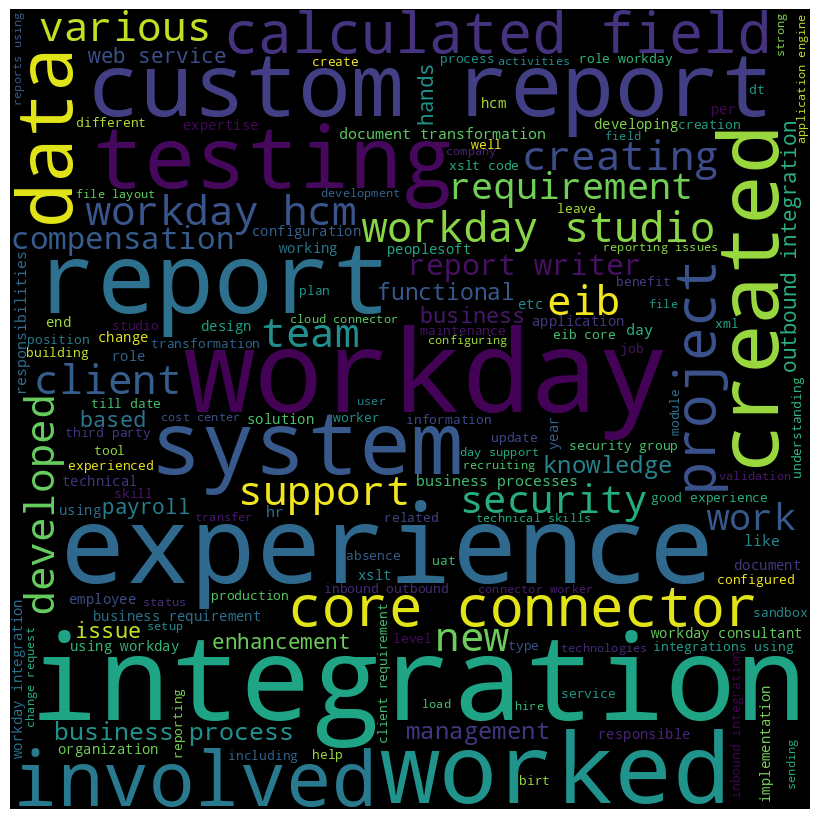

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stop_words,
                min_font_size = 10).generate(all_text)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

**-->The biggest words such as project, application, data, worked, system, report, and database appear most frequently.**

**-->These words suggest that the text is related to project work, software applications, and data handling.**

**-->Action words like using, created, testing, and implemented show that the person has hands-on experience.**

**-->Overall, this word cloud helps us quickly understand the main topics and skills in the text.**

# Model Building

Feature extraction

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
le=LabelEncoder()


In [32]:
df['LabelEncoder']=le.fit_transform(df["content"])

In [33]:
df

,content,file_name,text_length,LabelEncoder
0,chinna subbarayudu m dob th march nationality ...,workday,5992,0
1,name gopi krishna reddy professional summery w...,workday,4245,8
2,hari krishna m summary a result oriented profe...,workday,8050,2
3,harikrishna akula summary years of it experien...,workday,7490,3
4,hima mendu career objective to continue growin...,workday,3856,4
5,g himaja career objective to work towards achi...,workday,5038,1
6,name j sumanth royal professional summary have...,workday,5704,9
7,jyoti verma years of experience in workday as ...,workday,3504,5
8,madeeswar a profile summary having around year...,workday,5479,6
9,mooraboyina guravaiah workday integration spec...,workday,6715,7


-->With the lable encoder we can create the text  to the binary format which is the `1` and the `0`   
--> But there is the one issue with this it will create the `spas matrix` where this leads to the `over fitting` the model  
-->It will not create the `fixed output`   
-->When it is come to the sentiment analysis it will not capture the `meaning of the words`  
--> To over come this situation we use the `TF-IDF` (Term frequency-inverse document frequency)

## Using the TF-IDF

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:
df

,content,file_name,text_length,LabelEncoder
0,chinna subbarayudu m dob th march nationality ...,workday,5992,0
1,name gopi krishna reddy professional summery w...,workday,4245,8
2,hari krishna m summary a result oriented profe...,workday,8050,2
3,harikrishna akula summary years of it experien...,workday,7490,3
4,hima mendu career objective to continue growin...,workday,3856,4
5,g himaja career objective to work towards achi...,workday,5038,1
6,name j sumanth royal professional summary have...,workday,5704,9
7,jyoti verma years of experience in workday as ...,workday,3504,5
8,madeeswar a profile summary having around year...,workday,5479,6
9,mooraboyina guravaiah workday integration spec...,workday,6715,7


In [36]:
df.drop(columns=["text_length","LabelEncoder"],axis=1,inplace=True)

In [37]:
df

,content,file_name
0,chinna subbarayudu m dob th march nationality ...,workday
1,name gopi krishna reddy professional summery w...,workday
2,hari krishna m summary a result oriented profe...,workday
3,harikrishna akula summary years of it experien...,workday
4,hima mendu career objective to continue growin...,workday
5,g himaja career objective to work towards achi...,workday
6,name j sumanth royal professional summary have...,workday
7,jyoti verma years of experience in workday as ...,workday
8,madeeswar a profile summary having around year...,workday
9,mooraboyina guravaiah workday integration spec...,workday


In [53]:
x=all_resumes_df['content'].values
y=all_resumes_df['file_name'].values

In [54]:
x

array(['ANIL KUMAR MADDUKURI  \t\t\nSQL & MSBI Developer   \nSummary\n2.4 years of experience in MS SQL Server (SSMS) and creating SSIS packages, SSRS Reports by using Microsoft Business Intelligence (MSBI) tools.\nExpertise in various types of Joins and Sub Queries for writing complex queries involving multiple tables.\nHandled data manipulation and data consistency by creating Views, Triggers, and Synonyms.\nHands on experience in creation, optimization and debugging Stored Procedure and Functions.\nFamiliar in writing queries using CTE, Temporary Tables and Table Variables.\nGood experience in using Set Operators like Union, Union All, Except and Intersect to assist required data.\nExperience in manipulate the data from multiple table and report to the client using Aggregate Functions, Windows Functions and String Functions.\nWorked extensively on Data Extraction, Transformation and Loading (ETL) process in SQL Server Integration Services.\nUsed containers such as for each loop cont

In [55]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)
x_train.shape,x_test.shape

((63,), (16,))

In [56]:
tfidf = TfidfVectorizer(sublinear_tf=True,stop_words='english')


In [57]:
tfidf=TfidfVectorizer()
x_train=tfidf.fit_transform(x_train)
x_test=tfidf.transform(x_test)

In [58]:
x_train,y_test

(<Compressed Sparse Row sparse matrix of dtype 'float64'
 	with 16660 stored elements and shape (63, 3990)>,
 array(['workday', 'workday', 'workday', 'People Soft', 'React Developer',
        'People Soft', 'React Developer', 'SQL Developer',
        'React Developer', 'SQL Developer', 'React Developer',
        'SQL Developer', 'React Developer', 'People Soft', 'People Soft',
        'workday'], dtype=object))

# **SVM**

In [59]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

TUNING

In [60]:
# there are the different kernels in the svm we can tune them
kernel=['linear','poly','rbf','sigmoid']
for i in kernel:
    clf = SVC(kernel=i)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {i} kernel: {accuracy}")

Accuracy for linear kernel: 1.0
Accuracy for poly kernel: 1.0
Accuracy for rbf kernel: 1.0
Accuracy for sigmoid kernel: 1.0


In [61]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}
gsv = GridSearchCV(SVC(), param_grid,cv=10)
gsv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]})

In [62]:
model=SVC(C=10,gamma=0.001)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [63]:
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred,average='weighted')
recall=recall_score(y_test,y_pred,average='weighted')
f1=f1_score(y_test,y_pred,average='weighted')

In [64]:
classification_report(y_test,y_pred)
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

Accuracy : 0.3125
Precision: 0.0977
Recall   : 0.3125
F1 Score : 0.1488


## Naive bayes classifier

In [65]:
from sklearn.naive_bayes import MultinomialNB


In [66]:
naive_bayes=MultinomialNB()
naive_bayes.fit(x_train,y_train)
y_pred=naive_bayes.predict(x_test)

In [67]:
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred,average='weighted')
recall=recall_score(y_test,y_pred,average='weighted')

In [68]:
classification_report(y_test,y_pred)
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")

Accuracy : 0.8750
Precision: 0.9167
Recall   : 0.8750


**Why Naive Bayes ?**  

-->It’s very fast and handles `large text` datasets well.  
-->It works great with `TF-IDF` features.  
-->It performs well even with small amounts of data.  
-->It’s easy to implement and often used for tasks like `spam detection`, `sentiment analysis`, and `text classification` like the resume classification

## Logistic regression

In [83]:
# imorting the libraries
from sklearn.linear_model import LogisticRegression

In [84]:
# Fitting the model
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)
y_pred=log_reg.predict(x_test)

In [85]:
# Evaluting metrics
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred,average='weighted')
recall=recall_score(y_test,y_pred,average='weighted')
f1=f1_score(y_test,y_pred,average='weighted')

In [86]:
# converting the scores into the data frame
log_score=pd.DataFrame({'accuracy':[accuracy],'precision':[precision],'recall':[recall],'f1':[f1]})
log_score

,accuracy,precision,recall,f1
0,1.0,1.0,1.0,1.0


In [87]:
# classification report
classification_rep=classification_report(y_test,y_pred)
print(classification_rep)

                 precision    recall  f1-score   support

    People Soft       1.00      1.00      1.00         4
React Developer       1.00      1.00      1.00         5
  SQL Developer       1.00      1.00      1.00         3
        workday       1.00      1.00      1.00         4

       accuracy                           1.00        16
      macro avg       1.00      1.00      1.00        16
   weighted avg       1.00      1.00      1.00        16



**why Logestic regression ?**  

-->It works well with text data turned into vectors using TF-IDF.  
-->It’s fast and efficient, even with many features (words).
It gives probabilities, which helps in ranking
It’s easy to understand and shows which words influence decisions.

## Random forest classifier

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [90]:
Rfc=RandomForestClassifier(random_state=42)

In [96]:
print("\nHyperparameter Tuning for Random Forest...")
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5],      # should be at least 2
    'min_samples_leaf': [1, 4]
}



Hyperparameter Tuning for Random Forest...


In [98]:
gsv.best_params_,gsv.best_score_

({'C': 10, 'gamma': 0.1}, np.float64(0.9833333333333334))

In [99]:
Rfc = RandomForestClassifier(n_estimators=100, random_state=42)
Rfc.fit(x_train, y_train)
y_pred = Rfc.predict(x_test)

In [75]:
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred,average='weighted')
recall=recall_score(y_test,y_pred,average='weighted')

In [76]:
classification_report(y_test,y_pred)
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")

Accuracy : 1.0000
Precision: 1.0000
Recall   : 1.0000


### Decision Tree classifier

In [77]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [78]:
D_tree=DecisionTreeClassifier()
D_tree.fit(x_train,y_train)
y_pred=D_tree.predict(x_test)

In [79]:
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred,average='weighted')
recall=recall_score(y_test,y_pred,average='weighted')

In [80]:
classification_report(y_test,y_pred)
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")

Accuracy : 1.0000
Precision: 1.0000
Recall   : 1.0000


**why Decision Tree Classifier ?**  
-->They can handle categorical and numerical features, including TF-IDF vectors from text.  
-->They are easy to interpret, showing clear “if-else” rules for text classification.  
-->They work well for small to medium-sized datasets.  
-->They can capture non-linear patterns in text data.

# Creating pipeline

In [81]:
from sklearn.pipeline import Pipeline


In [82]:
display(all_resumes_df)

,content,file_name
0,ANIL KUMAR MADDUKURI \t\t\nSQL & MSBI Develop...,SQL Developer
1,Aradhana Tripathi\nCurrent Location: Gachibowl...,SQL Developer
2,BUDDHA VAMSI ...,SQL Developer
3,KAMBALLA PRADEEP ...,SQL Developer
4, Hyderabad\nNazeer Basha\nSQL and Power BI De...,SQL Developer
...,...,...
74,MD KHIZARUDDIN RAUF \n \t EXPERIENCE \n⇨ Curre...,React Developer
75,Name: M. Prabakaran\nTitle: UI Developer\nPROF...,React Developer
76,Pranish Sonone\nCareer summary:\nExperience of...,React Developer
77,Ranga Gaganam \nHaving 1+ years of successful...,React Developer


In [100]:
df1=all_resumes_df.copy()

In [101]:
df1

,content,file_name
0,ANIL KUMAR MADDUKURI \t\t\nSQL & MSBI Develop...,SQL Developer
1,Aradhana Tripathi\nCurrent Location: Gachibowl...,SQL Developer
2,BUDDHA VAMSI ...,SQL Developer
3,KAMBALLA PRADEEP ...,SQL Developer
4, Hyderabad\nNazeer Basha\nSQL and Power BI De...,SQL Developer
...,...,...
74,MD KHIZARUDDIN RAUF \n \t EXPERIENCE \n⇨ Curre...,React Developer
75,Name: M. Prabakaran\nTitle: UI Developer\nPROF...,React Developer
76,Pranish Sonone\nCareer summary:\nExperience of...,React Developer
77,Ranga Gaganam \nHaving 1+ years of successful...,React Developer


In [102]:
x=df1['content'].values
y=df1['file_name'].values

In [103]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)
x_train.shape,x_test.shape

((63,), (16,))

In [104]:
pipeline=Pipeline([('tfidf',TfidfVectorizer(sublinear_tf=True,stop_words='english')),
 ("Log_regression",LogisticRegression())])

In [105]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(stop_words='english', sublinear_tf=True)),
                ('Log_regression', LogisticRegression())])

In [106]:
import pickle
with open('resume_classifier.pkl','wb') as f:
  pickle.dump(pipeline,f)

  print(
      "Model saved to resume_classifier.pkl"
  )

Model saved to resume_classifier.pkl


In [107]:
script = """import streamlit as st
import pickle
import docx2txt
from PyPDF2 import PdfReader

# Load model
with open("resume_domain_classifier.pkl", "rb") as f:
    model = pickle.load(f)

st.set_page_config(page_title="Resume Domain Classifier", layout="centered")
st.title("📄 Resume Domain Classifier")
st.write("Upload a resume (PDF, DOCX, or TXT) to predict its professional domain.")

uploaded_file = st.file_uploader("Upload Resume", type=["pdf", "docx", "txt"])

# Text extraction
def extract_text(file):
    if file.name.endswith('.pdf'):
        reader = PdfReader(file)
        text = ""
        for page in reader.pages:
            text += page.extract_text() or ""
        return text
    elif file.name.endswith('.docx'):
        return docx2txt.process(file)
    elif file.name.endswith('.txt'):
        return str(file.read(), "utf-8")
    else:
        return ""

# Handle uploaded resume
if uploaded_file:
    resume_text = extract_text(uploaded_file)

    if resume_text.strip() == "":
        st.error("No text could be extracted. Please upload a valid file.")
    else:
        st.subheader("📑 Extracted Resume Content")
        st.text_area("Resume Text", resume_text[:2000], height=200)

        if st.button("🔍 Predict Domain"):
            prediction = model.predict([resume_text])[0]
            st.success(f"🎯 **Predicted Domain:** {prediction}") """
with open("Resume_classifacation.py", "w") as f:
    f.write(script)

In [108]:
pip install docx2txt
